In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
from collections import Counter
import pickle
from keras.layers import Dense, Dropout, Flatten  
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

Using TensorFlow backend.
d:\anacoda\envs\machine\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\anacoda\envs\machine\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\anacoda\envs\machine\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\anacoda\envs\machine\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [73]:
def column_deletor(list_of_cols,data):
    temp=data
    temp=temp.drop(list_of_cols,axis=1)
    return temp


data=pd.read_csv('value_only_jarvisdata.csv')
data=column_deletor(['Unnamed: 0','Unnamed: 0.1'],data)
data.head()


,epsilon_x opt,epsilon_y opt,epsilon_z opt,e_form,shear modulus,bulk modulus,gap tbmbj,epsilon_x tbmbj,epsilon_y tbmbj,epsilon_z tbmbj,gap opt
0,21.0673,29.1228,17.6066,0.025,19.993,34.556,0.6495,15.0619,14.9875,12.4788,0.0221
1,13.8023,38.1854,35.5515,-1.184,25.667,78.478,0.0083,16.5818,61.5222,53.1874,0.0038
2,6.3933,6.9466,6.3796,-2.086,52.420,75.067,2.4642,5.2402,5.8492,5.3897,1.9202
3,6.0838,6.0838,6.5652,-0.204,5.947,17.478,2.7025,4.5320,4.5323,4.9101,1.2599
4,7.0316,6.3127,5.2274,-1.768,37.120,54.633,2.2441,6.0366,5.5260,4.6886,1.8723


In [76]:
pdf=pd.DataFrame(x)
pdf.head()

,0,1,2,3,4,5,6,7,8,9
0,0.410054,0.216309,0.106529,0.728909,0.079414,0.019940,0.981301,0.890752,0.376303,0.001225
1,0.261096,0.286184,0.222116,0.529305,0.178007,0.000249,0.982124,0.912195,0.443655,0.000206
2,0.109185,0.045325,0.034213,0.380386,0.170350,0.075669,0.975976,0.886541,0.364574,0.106878
3,0.102840,0.038672,0.035408,0.691101,0.041078,0.082987,0.975593,0.885934,0.363780,0.070124
4,0.122273,0.040437,0.026791,0.432888,0.124481,0.068910,0.976408,0.886392,0.363414,0.104211


In [75]:
import pandas as pd
from sklearn import preprocessing

x1 = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
data = pd.DataFrame(x_scaled)

shear_values=data[4]
non_shear_values=data.drop([4],axis =1)
x=pd.DataFrame.to_numpy(non_shear_values)
y=pd.DataFrame.to_numpy(shear_values)



from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y)


In [27]:
model = Sequential()    
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(24, activation='tanh'))
model.add(Dense(48, activation='sigmoid'))
model.add(Dense(24, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse',  
       optimizer='adam',       
       metrics=['accuracy'])
# model.summary()

In [28]:
model.fit(x_train,y_train,epochs=100,batch_size=100)
score = model.evaluate(x_test, y_test, batch_size=100)
print('\n the error on our output is ' + str(score))

Epoch 1/100
3121/3121 [==============================] - 1s 162us/step - loss: 0.0140 - acc: 3.2041e-04
Epoch 2/100
3121/3121 [==============================] - 0s 14us/step - loss: 0.0075 - acc: 3.2041e-04
Epoch 3/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0073 - acc: 3.2041e-04
Epoch 4/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0070 - acc: 3.2041e-04
Epoch 5/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0068 - acc: 3.2041e-04
Epoch 6/100
3121/3121 [==============================] - 0s 10us/step - loss: 0.0063 - acc: 3.2041e-04
Epoch 7/100
3121/3121 [==============================] - 0s 10us/step - loss: 0.0059 - acc: 3.2041e-04
Epoch 8/100
3121/3121 [==============================] - 0s 10us/step - loss: 0.0054 - acc: 3.2041e-04
Epoch 9/100
3121/3121 [==============================] - 0s 10us/step - loss: 0.0047 - acc: 3.2041e-04
Epoch 10/100
3121/3121 [==============================] - 0s 10us/step -

3121/3121 [==============================] - 0s 11us/step - loss: 0.0015 - acc: 6.4082e-04
Epoch 80/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0012 - acc: 6.4082e-04
Epoch 81/100
3121/3121 [==============================] - 0s 10us/step - loss: 0.0012 - acc: 6.4082e-04
Epoch 82/100
3121/3121 [==============================] - 0s 10us/step - loss: 0.0012 - acc: 6.4082e-04
Epoch 83/100
3121/3121 [==============================] - 0s 10us/step - loss: 0.0013 - acc: 6.4082e-04
Epoch 84/100
3121/3121 [==============================] - 0s 9us/step - loss: 0.0017 - acc: 6.4082e-04
Epoch 85/100
3121/3121 [==============================] - ETA: 0s - loss: 9.3259e-04 - acc: 0.0000e+0 - 0s 9us/step - loss: 0.0012 - acc: 6.4082e-04
Epoch 86/100
3121/3121 [==============================] - 0s 10us/step - loss: 0.0013 - acc: 6.4082e-04
Epoch 87/100
3121/3121 [==============================] - 0s 9us/step - loss: 0.0012 - acc: 6.4082e-04
Epoch 88/100
3121/3121 [==========

In [59]:
import matplotlib.pyplot as plt
model_mse = Sequential()

model_mse.add(Dense(units = 10, activation = 'sigmoid', input_dim = 10))
model_mse.add(Dense(units = 16, activation = 'sigmoid'))
model_mse.add(Dense(units = 32, activation = 'sigmoid'))
model_mse.add(Dense(units = 16, activation = 'sigmoid'))
model_mse.add(Dense(units = 1, activation="linear"))
model_mse.compile(optimizer = 'adam', loss = 'mse')

history_mse = model_mse.fit(x_train, y_train, batch_size = 100, epochs = 100,verbose=1)

score = model_mse.evaluate(x_test, y_test, batch_size=100)
print('\n score for mse is ' + str(score))

model_mae = Sequential()
model_mae.add(Dense(units = 10, activation = 'sigmoid', input_dim = 10))
model_mae.add(Dense(units = 16, activation = 'sigmoid'))
model_mae.add(Dense(units = 32, activation = 'sigmoid'))
model_mae.add(Dense(units = 16, activation = 'sigmoid'))
model_mae.add(Dense(units = 1, activation="linear"))
model_mae.compile(optimizer = 'adam', loss = 'mae')

history_mae = model_mae.fit(x_train, y_train, batch_size = 100, epochs = 100,verbose=1)

score = model_mae.evaluate(x_test, y_test, batch_size=100)
print('\n score for mae is ' + str(score))

model_sq = Sequential()
model_sq.add(Dense(units = 10, activation = 'sigmoid', input_dim = 10))
model_sq.add(Dense(units = 16, activation = 'sigmoid'))
model_sq.add(Dense(units = 32, activation = 'sigmoid'))
model_sq.add(Dense(units = 16, activation = 'sigmoid'))
model_sq.add(Dense(units = 1, activation="linear"))
model_sq.compile(optimizer = 'adam', loss = 'squared_hinge')

history_Sq_hinge = model_sq.fit(x_train, y_train, batch_size = 100, epochs = 100,verbose=1)

score = model_sq.evaluate(x_test, y_test, batch_size=100)
print('\n score for Squared hinge loss is ' + str(score))


Epoch 1/100
3121/3121 [==============================] - 3s 1ms/step - loss: 0.0094
Epoch 2/100
3121/3121 [==============================] - 0s 66us/step - loss: 0.0073
Epoch 3/100
3121/3121 [==============================] - 0s 67us/step - loss: 0.0072
Epoch 4/100
3121/3121 [==============================] - 0s 59us/step - loss: 0.0072
Epoch 5/100
3121/3121 [==============================] - 0s 66us/step - loss: 0.0072
Epoch 6/100
3121/3121 [==============================] - 0s 65us/step - loss: 0.0072
Epoch 7/100
3121/3121 [==============================] - 0s 64us/step - loss: 0.0072
Epoch 8/100
3121/3121 [==============================] - 0s 58us/step - loss: 0.0073
Epoch 9/100
3121/3121 [==============================] - 0s 61us/step - loss: 0.0071
Epoch 10/100
3121/3121 [==============================] - 0s 63us/step - loss: 0.0071
Epoch 11/100
3121/3121 [==============================] - 0s 65us/step - loss: 0.0071
Epoch 12/100
3121/3121 [==============================] - 0s 64u

3121/3121 [==============================] - 0s 64us/step - loss: 0.0010
Epoch 97/100
3121/3121 [==============================] - 0s 63us/step - loss: 9.9441e-04
Epoch 98/100
3121/3121 [==============================] - 0s 62us/step - loss: 9.7871e-04
Epoch 99/100
3121/3121 [==============================] - 0s 64us/step - loss: 9.9715e-04
Epoch 100/100
1041/1041 [==============================] - 1s 1ms/step

 score for mse is 0.0009461898930589101
Epoch 1/100
3121/3121 [==============================] - 4s 1ms/step - loss: 0.1976
Epoch 2/100
3121/3121 [==============================] - 0s 60us/step - loss: 0.0511
Epoch 3/100
3121/3121 [==============================] - 0s 63us/step - loss: 0.0478
Epoch 4/100
3121/3121 [==============================] - 0s 61us/step - loss: 0.0479
Epoch 5/100
3121/3121 [==============================] - 0s 66us/step - loss: 0.0479
Epoch 6/100
3121/3121 [==============================] - 0s 67us/step - loss: 0.0477
Epoch 7/100
3121/3121 [=============

3121/3121 [==============================] - 0s 70us/step - loss: 0.0202
Epoch 91/100
3121/3121 [==============================] - 0s 66us/step - loss: 0.0212
Epoch 92/100
3121/3121 [==============================] - 0s 74us/step - loss: 0.0202
Epoch 93/100
3121/3121 [==============================] - 0s 81us/step - loss: 0.0204
Epoch 94/100
3121/3121 [==============================] - 0s 77us/step - loss: 0.0201
Epoch 95/100
3121/3121 [==============================] - 0s 73us/step - loss: 0.0198
Epoch 96/100
3121/3121 [==============================] - 0s 65us/step - loss: 0.0200
Epoch 97/100
3121/3121 [==============================] - 0s 66us/step - loss: 0.0199
Epoch 98/100
3121/3121 [==============================] - 0s 65us/step - loss: 0.0198
Epoch 99/100
3121/3121 [==============================] - 0s 64us/step - loss: 0.0206
Epoch 100/100
1041/1041 [==============================] - 1s 1ms/step

 score for mae is 0.02049033492660431
Epoch 1/100
3121/3121 [====================

3121/3121 [==============================] - 0s 68us/step - loss: 0.0103
Epoch 85/100
3121/3121 [==============================] - 0s 66us/step - loss: 0.0101
Epoch 86/100
3121/3121 [==============================] - 0s 76us/step - loss: 0.0099
Epoch 87/100
3121/3121 [==============================] - 0s 76us/step - loss: 0.0096
Epoch 88/100
3121/3121 [==============================] - 0s 78us/step - loss: 0.0094
Epoch 89/100
3121/3121 [==============================] - 0s 79us/step - loss: 0.0092
Epoch 90/100
3121/3121 [==============================] - 0s 78us/step - loss: 0.0090
Epoch 91/100
3121/3121 [==============================] - 0s 79us/step - loss: 0.0088
Epoch 92/100
3121/3121 [==============================] - 0s 77us/step - loss: 0.0086
Epoch 93/100
3121/3121 [==============================] - 0s 68us/step - loss: 0.0084
Epoch 94/100
3121/3121 [==============================] - 0s 66us/step - loss: 0.0082
Epoch 95/100
3121/3121 [==============================] - 0s 65us/s

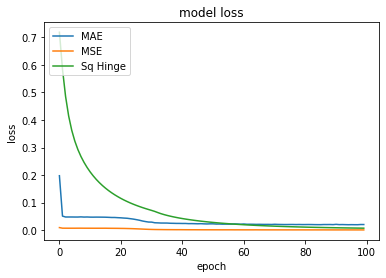

In [60]:
plt.plot(history_mae.history['loss'])
plt.plot(history_mse.history['loss'])
plt.plot(history_Sq_hinge.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE','Sq Hinge'], loc='upper left')
plt.show()


In [61]:
def predictor(model,x_test):
    y_pred=model.predict(x_test)
    return y_pred
y_mse=predictor(model_mse,x_test)
y_mae=predictor(model_mae,x_test)
y_sq=predictor(model_sq,x_test)

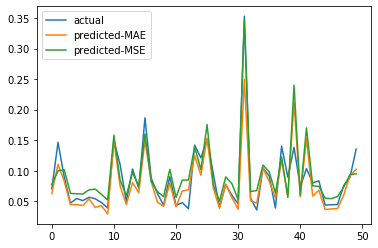

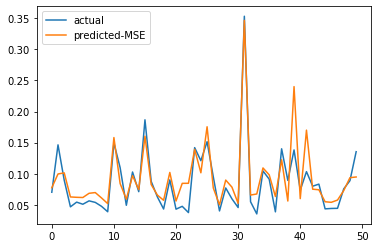

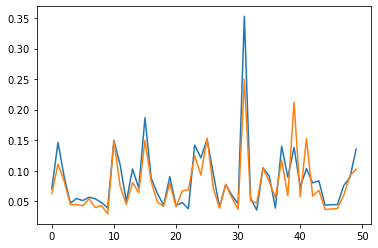

In [62]:
fig, ax = plt.subplots()
ax.plot(y_test[0:50])
ax.plot(y_mae[0:50])
ax.plot(y_mse[0:50])
ax.legend(['actual', 'predicted-MAE','predicted-MSE','predicted-SQ'], loc='upper left')
fig, ax2 = plt.subplots()
ax2.plot(y_test[0:50])
ax2.plot(y_mse[0:50])
ax2.legend(['actual', 'predicted-MSE','predicted-MSE','predicted-SQ'], loc='upper left')
fig, ax3 = plt.subplots()
ax3.plot(y_test[0:50])
ax3.plot(y_mae[0:50])
ax.legend(['actual', 'predicted-MAE','predicted-MSE','predicted-SQ'], loc='upper left')


Epoch 1/100
3121/3121 [==============================] - 1s 286us/step - loss: 0.0509
Epoch 2/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0093
Epoch 3/100
3121/3121 [==============================] - 0s 14us/step - loss: 0.0069
Epoch 4/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0061
Epoch 5/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0056
Epoch 6/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0049
Epoch 7/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0043
Epoch 8/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0037
Epoch 9/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0031
Epoch 10/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0026
Epoch 11/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0023
Epoch 12/100
3121/3121 [==============================] - 0s 1

3121/3121 [==============================] - 0s 12us/step - loss: 0.0014
Epoch 97/100
3121/3121 [==============================] - 0s 14us/step - loss: 0.0014
Epoch 98/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0014
Epoch 99/100
3121/3121 [==============================] - 0s 15us/step - loss: 0.0014
Epoch 100/100
1041/1041 [==============================] - 0s 318us/step

 score for mse is 0.0009127969241980194
Epoch 1/100
3121/3121 [==============================] - 1s 301us/step - loss: 0.1024
Epoch 2/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0501
Epoch 3/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0417
Epoch 4/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0363
Epoch 5/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0316
Epoch 6/100
3121/3121 [==============================] - 0s 10us/step - loss: 0.0290
Epoch 7/100
3121/3121 [=====================

3121/3121 [==============================] - 0s 12us/step - loss: 0.0199
Epoch 91/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0198
Epoch 92/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0198
Epoch 93/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0192
Epoch 94/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0191
Epoch 95/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0214
Epoch 96/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0194
Epoch 97/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0194
Epoch 98/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0203
Epoch 99/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0238
Epoch 100/100
1041/1041 [==============================] - 0s 332us/step

 score for mae is 0.016948963504724784
Epoch 1/100
3121/3121 [=================

3121/3121 [==============================] - 0s 16us/step - loss: 0.0078
Epoch 85/100
3121/3121 [==============================] - 0s 18us/step - loss: 0.0076
Epoch 86/100
3121/3121 [==============================] - 0s 17us/step - loss: 0.0074
Epoch 87/100
3121/3121 [==============================] - 0s 18us/step - loss: 0.0073
Epoch 88/100
3121/3121 [==============================] - 0s 17us/step - loss: 0.0071
Epoch 89/100
3121/3121 [==============================] - 0s 19us/step - loss: 0.0070
Epoch 90/100
3121/3121 [==============================] - 0s 19us/step - loss: 0.0068
Epoch 91/100
3121/3121 [==============================] - 0s 18us/step - loss: 0.0067
Epoch 92/100
3121/3121 [==============================] - 0s 18us/step - loss: 0.0066
Epoch 93/100
3121/3121 [==============================] - 0s 16us/step - loss: 0.0065
Epoch 94/100
3121/3121 [==============================] - 0s 16us/step - loss: 0.0063
Epoch 95/100
3121/3121 [==============================] - 0s 16us/s

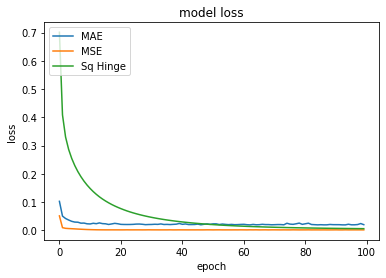

In [40]:
import matplotlib.pyplot as plt
model_mse = Sequential()
model_mse.add(Dense(units = 64, activation = 'sigmoid', input_dim = 10))
model_mse.add(Dense(units = 32, activation = 'tanh'))
model_mse.add(Dense(units = 16, activation = 'tanh'))
model_mse.add(Dense(units = 1, activation="linear"))
model_mse.compile(optimizer = 'adam', loss = 'mse')

history_mse = model_mse.fit(x_train, y_train, batch_size = 100, epochs = 100,verbose=1)

score = model_mse.evaluate(x_test, y_test, batch_size=100)
print('\n score for mse is ' + str(score))

model_mae = Sequential()
model_mae.add(Dense(units = 64, activation = 'sigmoid', input_dim = 10))
model_mae.add(Dense(units = 32, activation = 'tanh'))
model_mae.add(Dense(units = 16, activation = 'tanh'))
model_mae.add(Dense(units = 1, activation="linear"))
model_mae.compile(optimizer = 'adam', loss = 'mae')

history_mae = model_mae.fit(x_train, y_train, batch_size = 100, epochs = 100,verbose=1)

score = model_mae.evaluate(x_test, y_test, batch_size=100)
print('\n score for mae is ' + str(score))

model_sq = Sequential()
model_sq.add(Dense(units = 64, activation = 'sigmoid', input_dim = 10))
model_sq.add(Dense(units = 32, activation = 'tanh'))
model_sq.add(Dense(units = 16, activation = 'tanh'))
model_sq.add(Dense(units = 1, activation="linear"))
model_sq.compile(optimizer = 'adam', loss = 'squared_hinge')

history_Sq_hinge = model_sq.fit(x_train, y_train, batch_size = 100, epochs = 100,verbose=1)

score = model_sq.evaluate(x_test, y_test, batch_size=100)
print('\n score for Squared hinge loss is ' + str(score))


plt.plot(history_mae.history['loss'])
plt.plot(history_mse.history['loss'])
plt.plot(history_Sq_hinge.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE','Sq Hinge'], loc='upper left')
plt.show()

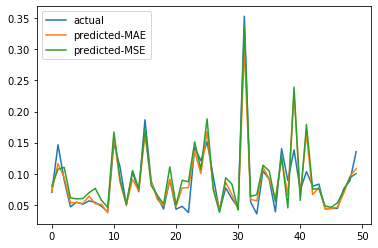

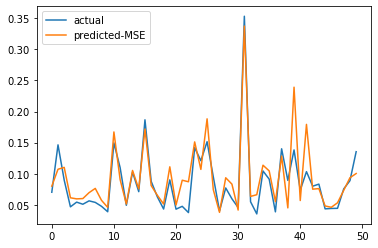

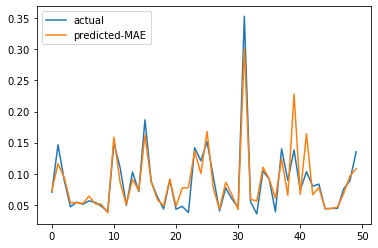

In [41]:
def predictor(model,x_test):
    y_pred=model.predict(x_test)
    return y_pred
y_mse=predictor(model_mse,x_test)
y_mae=predictor(model_mae,x_test)
y_sq=predictor(model_sq,x_test)

fig, ax = plt.subplots()
ax.plot(y_test[0:50])
ax.plot(y_mae[0:50])
ax.plot(y_mse[0:50])
ax.legend(['actual', 'predicted-MAE','predicted-MSE','predicted-SQ'], loc='upper left')
fig, ax2 = plt.subplots()
ax2.plot(y_test[0:50])
ax2.plot(y_mse[0:50])
ax2.legend(['actual', 'predicted-MSE','predicted-MSE','predicted-SQ'], loc='upper left')
fig, ax3 = plt.subplots()
ax3.plot(y_test[0:50])
ax3.plot(y_mae[0:50])
ax3.legend(['actual', 'predicted-MAE','predicted-MSE','predicted-SQ'], loc='upper left')

Epoch 1/100
3121/3121 [==============================] - 1s 310us/step - loss: 0.0233
Epoch 2/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0138
Epoch 3/100
3121/3121 [==============================] - 0s 14us/step - loss: 0.0105
Epoch 4/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0080
Epoch 5/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0061
Epoch 6/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0045
Epoch 7/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0034
Epoch 8/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0026
Epoch 9/100
3121/3121 [==============================] - 0s 12us/step - loss: 0.0021
Epoch 10/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0018
Epoch 11/100
3121/3121 [==============================] - 0s 11us/step - loss: 0.0016
Epoch 12/100
3121/3121 [==============================] - 0s 1

3121/3121 [==============================] - 0s 11us/step - loss: 8.4237e-04
Epoch 95/100
3121/3121 [==============================] - 0s 11us/step - loss: 8.8490e-04
Epoch 96/100
3121/3121 [==============================] - 0s 10us/step - loss: 9.0664e-04
Epoch 97/100
3121/3121 [==============================] - 0s 11us/step - loss: 8.4274e-04
Epoch 98/100
3121/3121 [==============================] - 0s 10us/step - loss: 8.5463e-04
Epoch 99/100
3121/3121 [==============================] - 0s 10us/step - loss: 8.2964e-04
Epoch 100/100
1041/1041 [==============================] - 0s 354us/step

 score for mse is 0.0010126759562624384
Epoch 1/100
3121/3121 [==============================] - 1s 337us/step - loss: 0.1097
Epoch 2/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0422
Epoch 3/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0366
Epoch 4/100
3121/3121 [==============================] - 0s 14us/step - loss: 0.0327
Epoch 5/100
3121/3

3121/3121 [==============================] - 0s 15us/step - loss: 0.0195
Epoch 89/100
3121/3121 [==============================] - 0s 15us/step - loss: 0.0194
Epoch 90/100
3121/3121 [==============================] - 0s 15us/step - loss: 0.0194
Epoch 91/100
3121/3121 [==============================] - 0s 15us/step - loss: 0.0191
Epoch 92/100
3121/3121 [==============================] - 0s 14us/step - loss: 0.0192
Epoch 93/100
3121/3121 [==============================] - 0s 14us/step - loss: 0.0192
Epoch 94/100
3121/3121 [==============================] - 0s 14us/step - loss: 0.0194
Epoch 95/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0192
Epoch 96/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0193
Epoch 97/100
3121/3121 [==============================] - 0s 14us/step - loss: 0.0195
Epoch 98/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0198
Epoch 99/100
3121/3121 [==============================] - 0s 13us/s

3121/3121 [==============================] - 0s 14us/step - loss: 0.0085
Epoch 83/100
3121/3121 [==============================] - 0s 14us/step - loss: 0.0083
Epoch 84/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0082
Epoch 85/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0080
Epoch 86/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0078
Epoch 87/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0076
Epoch 88/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0075
Epoch 89/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0073
Epoch 90/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0072
Epoch 91/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0070
Epoch 92/100
3121/3121 [==============================] - 0s 13us/step - loss: 0.0069
Epoch 93/100
3121/3121 [==============================] - 0s 14us/s

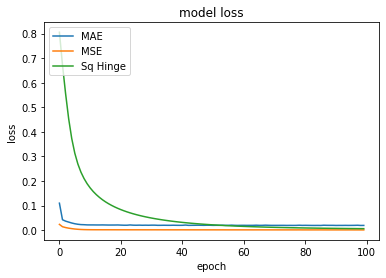

In [42]:
import matplotlib.pyplot as plt
model_mse = Sequential()
model_mse.add(Dense(units = 10, activation = 'tanh'))
model_mse.add(Dense(units = 16, activation = 'tanh'))
model_mse.add(Dense(units = 1, activation="linear"))
model_mse.compile(optimizer = 'adam', loss = 'mse')

history_mse = model_mse.fit(x_train, y_train, batch_size = 100, epochs = 100,verbose=1)

score = model_mse.evaluate(x_test, y_test, batch_size=100)
print('\n score for mse is ' + str(score))

model_mae = Sequential()
model_mae.add(Dense(units = 10, activation = 'tanh'))
model_mae.add(Dense(units = 16, activation = 'tanh'))
model_mae.add(Dense(units = 1, activation="linear"))
model_mae.compile(optimizer = 'adam', loss = 'mae')

history_mae = model_mae.fit(x_train, y_train, batch_size = 100, epochs = 100,verbose=1)

score = model_mae.evaluate(x_test, y_test, batch_size=100)
print('\n score for mae is ' + str(score))

model_sq = Sequential()
model_sq.add(Dense(units = 10, activation = 'tanh'))
model_sq.add(Dense(units = 16, activation = 'tanh'))
model_sq.add(Dense(units = 1, activation="linear"))
model_sq.compile(optimizer = 'adam', loss = 'squared_hinge')

history_Sq_hinge = model_sq.fit(x_train, y_train, batch_size = 100, epochs = 100,verbose=1)

score = model_sq.evaluate(x_test, y_test, batch_size=100)
print('\n score for Squared hinge loss is ' + str(score))


plt.plot(history_mae.history['loss'])
plt.plot(history_mse.history['loss'])
plt.plot(history_Sq_hinge.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE','Sq Hinge'], loc='upper left')
plt.show()

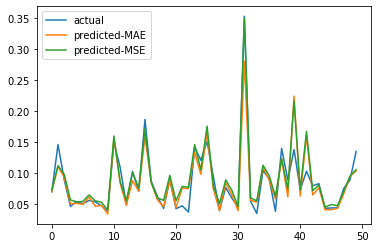

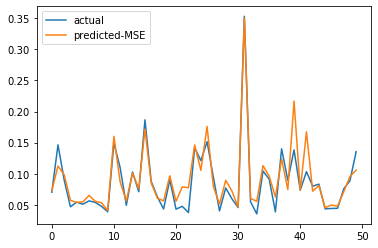

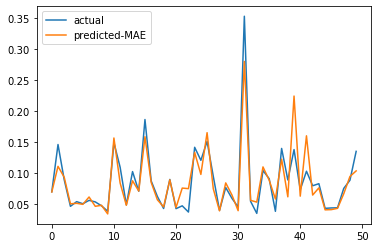

In [43]:
def predictor(model,x_test):
    y_pred=model.predict(x_test)
    return y_pred
y_mse=predictor(model_mse,x_test)
y_mae=predictor(model_mae,x_test)
y_sq=predictor(model_sq,x_test)

fig, ax = plt.subplots()
ax.plot(y_test[0:50])
ax.plot(y_mae[0:50])
ax.plot(y_mse[0:50])
ax.legend(['actual', 'predicted-MAE','predicted-MSE','predicted-SQ'], loc='upper left')
fig, ax2 = plt.subplots()
ax2.plot(y_test[0:50])
ax2.plot(y_mse[0:50])
ax2.legend(['actual', 'predicted-MSE','predicted-MSE','predicted-SQ'], loc='upper left')
fig, ax3 = plt.subplots()
ax3.plot(y_test[0:50])
ax3.plot(y_mae[0:50])
ax3.legend(['actual', 'predicted-MAE','predicted-MSE','predicted-SQ'], loc='upper left')

In [52]:
data1=pd.read_csv('value_only_jarvisdata.csv')
data1=column_deletor(['Unnamed: 0','Unnamed: 0.1','epsilon_x tbmbj','epsilon_y tbmbj','epsilon_z tbmbj'],data1)
data1.head()

,epsilon_x opt,epsilon_y opt,epsilon_z opt,e_form,shear modulus,bulk modulus,gap tbmbj,gap opt
0,21.0673,29.1228,17.6066,0.025,19.993,34.556,0.6495,0.0221
1,13.8023,38.1854,35.5515,-1.184,25.667,78.478,0.0083,0.0038
2,6.3933,6.9466,6.3796,-2.086,52.420,75.067,2.4642,1.9202
3,6.0838,6.0838,6.5652,-0.204,5.947,17.478,2.7025,1.2599
4,7.0316,6.3127,5.2274,-1.768,37.120,54.633,2.2441,1.8723


In [56]:
import pandas as pd
from sklearn import preprocessing

x1 = data1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
data = pd.DataFrame(x_scaled)

shear_values=data[4]
non_shear_values=data.drop([4],axis =1)
x=pd.DataFrame.to_numpy(non_shear_values)
y=pd.DataFrame.to_numpy(shear_values)



from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x, y)


Epoch 1/100
3121/3121 [==============================] - 3s 1ms/step - loss: 0.0563
Epoch 2/100
3121/3121 [==============================] - 0s 70us/step - loss: 0.0070
Epoch 3/100
3121/3121 [==============================] - 0s 68us/step - loss: 0.0056
Epoch 4/100
3121/3121 [==============================] - 0s 70us/step - loss: 0.0056
Epoch 5/100
3121/3121 [==============================] - 0s 72us/step - loss: 0.0056
Epoch 6/100
3121/3121 [==============================] - 0s 68us/step - loss: 0.0056: 0s - loss: 0.0
Epoch 7/100
3121/3121 [==============================] - 0s 68us/step - loss: 0.0056
Epoch 8/100
3121/3121 [==============================] - 0s 66us/step - loss: 0.0056
Epoch 9/100
3121/3121 [==============================] - 0s 62us/step - loss: 0.0056
Epoch 10/100
3121/3121 [==============================] - 0s 63us/step - loss: 0.0055
Epoch 11/100
3121/3121 [==============================] - 0s 60us/step - loss: 0.0055
Epoch 12/100
3121/3121 [========================

3121/3121 [==============================] - 0s 66us/step - loss: 9.9217e-04
Epoch 97/100
3121/3121 [==============================] - 0s 67us/step - loss: 9.9547e-04
Epoch 98/100
3121/3121 [==============================] - 0s 67us/step - loss: 9.8670e-04
Epoch 99/100
3121/3121 [==============================] - 0s 66us/step - loss: 9.5840e-04
Epoch 100/100
1041/1041 [==============================] - 1s 1ms/step

 score for mse is 0.001926195010125519
Epoch 1/100
3121/3121 [==============================] - 3s 1ms/step - loss: 0.3137
Epoch 2/100
3121/3121 [==============================] - 0s 59us/step - loss: 0.0549
Epoch 3/100
3121/3121 [==============================] - 0s 64us/step - loss: 0.0459
Epoch 4/100
3121/3121 [==============================] - 0s 64us/step - loss: 0.0455
Epoch 5/100
3121/3121 [==============================] - 0s 65us/step - loss: 0.0452
Epoch 6/100
3121/3121 [==============================] - 0s 62us/step - loss: 0.0450
Epoch 7/100
3121/3121 [==========

3121/3121 [==============================] - 0s 66us/step - loss: 0.0193
Epoch 91/100
3121/3121 [==============================] - 0s 63us/step - loss: 0.0192
Epoch 92/100
3121/3121 [==============================] - 0s 66us/step - loss: 0.0193
Epoch 93/100
3121/3121 [==============================] - 0s 63us/step - loss: 0.0193
Epoch 94/100
3121/3121 [==============================] - 0s 64us/step - loss: 0.0189
Epoch 95/100
3121/3121 [==============================] - 0s 59us/step - loss: 0.0189
Epoch 96/100
3121/3121 [==============================] - 0s 64us/step - loss: 0.0190
Epoch 97/100
3121/3121 [==============================] - 0s 65us/step - loss: 0.0187
Epoch 98/100
3121/3121 [==============================] - 0s 65us/step - loss: 0.0189
Epoch 99/100
3121/3121 [==============================] - 0s 71us/step - loss: 0.0188
Epoch 100/100
1041/1041 [==============================] - 1s 1ms/step

 score for mae is 0.023583659610561632
Epoch 1/100
3121/3121 [===================

3121/3121 [==============================] - 0s 63us/step - loss: 0.0160
Epoch 85/100
3121/3121 [==============================] - 0s 67us/step - loss: 0.0155
Epoch 86/100
3121/3121 [==============================] - 0s 66us/step - loss: 0.0152
Epoch 87/100
3121/3121 [==============================] - 0s 63us/step - loss: 0.0148
Epoch 88/100
3121/3121 [==============================] - 0s 65us/step - loss: 0.0144
Epoch 89/100
3121/3121 [==============================] - 0s 63us/step - loss: 0.0141
Epoch 90/100
3121/3121 [==============================] - 0s 67us/step - loss: 0.0137
Epoch 91/100
3121/3121 [==============================] - 0s 66us/step - loss: 0.0134
Epoch 92/100
3121/3121 [==============================] - 0s 70us/step - loss: 0.0131
Epoch 93/100
3121/3121 [==============================] - 0s 65us/step - loss: 0.0128
Epoch 94/100
3121/3121 [==============================] - 0s 65us/step - loss: 0.0125
Epoch 95/100
3121/3121 [==============================] - 0s 67us/s

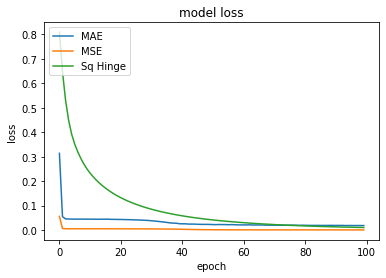

In [57]:
import matplotlib.pyplot as plt
model_mse = Sequential()

model_mse.add(Dense(units = 7, activation = 'sigmoid', input_dim = 7))
model_mse.add(Dense(units = 16, activation = 'sigmoid'))
model_mse.add(Dense(units = 32, activation = 'sigmoid'))
model_mse.add(Dense(units = 16, activation = 'sigmoid'))
model_mse.add(Dense(units = 1, activation="linear"))
model_mse.compile(optimizer = 'adam', loss = 'mse')

history_mse = model_mse.fit(x1_train, y1_train, batch_size = 100, epochs = 100,verbose=1)

score = model_mse.evaluate(x1_test, y1_test, batch_size=100)
print('\n score for mse is ' + str(score))

model_mae = Sequential()
model_mae.add(Dense(units = 7, activation = 'sigmoid', input_dim = 7))
model_mae.add(Dense(units = 16, activation = 'sigmoid'))
model_mae.add(Dense(units = 32, activation = 'sigmoid'))
model_mae.add(Dense(units = 16, activation = 'sigmoid'))
model_mae.add(Dense(units = 1, activation="linear"))
model_mae.compile(optimizer = 'adam', loss = 'mae')

history_mae = model_mae.fit(x1_train, y1_train, batch_size = 100, epochs = 100,verbose=1)

score = model_mae.evaluate(x1_test, y1_test, batch_size=100)
print('\n score for mae is ' + str(score))

model_sq = Sequential()
model_sq.add(Dense(units = 7, activation = 'sigmoid', input_dim = 7))
model_sq.add(Dense(units = 16, activation = 'sigmoid'))
model_sq.add(Dense(units = 32, activation = 'sigmoid'))
model_sq.add(Dense(units = 16, activation = 'sigmoid'))
model_sq.add(Dense(units = 1, activation="linear"))
model_sq.compile(optimizer = 'adam', loss = 'squared_hinge')

history_Sq_hinge = model_sq.fit(x1_train, y1_train, batch_size = 100, epochs = 100,verbose=1)

score = model_sq.evaluate(x1_test, y1_test, batch_size=100)
print('\n score for Squared hinge loss is ' + str(score))


plt.plot(history_mae.history['loss'])
plt.plot(history_mse.history['loss'])
plt.plot(history_Sq_hinge.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE','Sq Hinge'], loc='upper left')
plt.show()


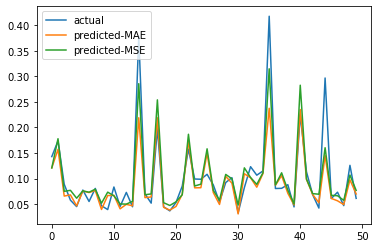

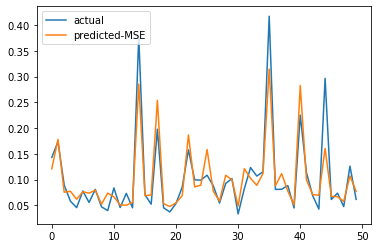

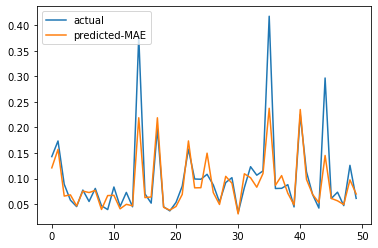

In [58]:
def predictor(model,x_test):
    y_pred=model.predict(x_test)
    return y_pred
y_mse=predictor(model_mse,x1_test)
y_mae=predictor(model_mae,x1_test)
y_sq=predictor(model_sq,x1_test)

fig, ax = plt.subplots()
ax.plot(y1_test[0:50])
ax.plot(y_mae[0:50])
ax.plot(y_mse[0:50])
ax.legend(['actual', 'predicted-MAE','predicted-MSE','predicted-SQ'], loc='upper left')
fig, ax2 = plt.subplots()
ax2.plot(y1_test[0:50])
ax2.plot(y_mse[0:50])
ax2.legend(['actual', 'predicted-MSE','predicted-MSE','predicted-SQ'], loc='upper left')
fig, ax3 = plt.subplots()
ax3.plot(y1_test[0:50])
ax3.plot(y_mae[0:50])
ax3.legend(['actual', 'predicted-MAE','predicted-MSE','predicted-SQ'], loc='upper left')

In [65]:
y_mse=predictor(model_mse,x_test[334:335])

In [64]:
x_test[334]

array([0.31049514, 0.11676804, 0.05449551, 0.56661714, 0.16229357,
       0.04189443, 0.98136765, 0.8908388 , 0.37021854, 0.05331916])

In [66]:
y_mse

array([[0.09736609]], dtype=float32)

In [117]:

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
n=7
pca = PCA(n_components=n)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [118]:
x_train_pca

array([[ 6.39469826e-02, -1.52770821e-01, -2.34596255e-02, ...,
        -3.39350077e-04,  3.85929782e-04, -3.69196246e-04],
       [-3.39868169e-01,  1.91428964e-01,  3.49181002e-02, ...,
        -1.75580499e-03, -5.79714313e-04,  1.95429314e-03],
       [-2.39830730e-01,  3.17276713e-01,  9.39368961e-02, ...,
         2.47916698e-03, -3.50847498e-04, -6.17776614e-04],
       ...,
       [-8.10897550e-02,  7.42780036e-03, -6.91330026e-02, ...,
        -3.47445735e-03,  2.52131794e-03, -6.73036805e-03],
       [-1.30100605e-02,  1.27913981e-02, -8.10786422e-03, ...,
        -1.65102120e-03, -5.04939251e-04, -1.06673556e-03],
       [ 6.48085819e-02, -1.96864992e-01, -1.57317780e-02, ...,
        -1.16475544e-03,  1.21315057e-04, -7.87951564e-04]])

In [122]:
import matplotlib.pyplot as plt
model_mse = Sequential()

model_mse.add(Dense(units = 5, activation = 'sigmoid', input_dim = n))
model_mse.add(Dense(units = 16, activation = 'sigmoid'))
model_mse.add(Dense(units = 10, activation = 'sigmoid'))
model_mse.add(Dense(units = 1, activation="linear"))
model_mse.compile(optimizer = 'adam', loss = 'mse')

history_mse = model_mse.fit(x_train_pca, y_train, batch_size = 10, epochs = 300,verbose=1)

score = model_mse.evaluate(x_test_pca, y_test, batch_size=100)
print('\n score for mse is ' + str(score))

Epoch 1/300
3121/3121 [==============================] - 2s 661us/step - loss: 0.0096
Epoch 2/300
3121/3121 [==============================] - 0s 135us/step - loss: 0.0052
Epoch 3/300
3121/3121 [==============================] - 0s 122us/step - loss: 0.0048
Epoch 4/300
3121/3121 [==============================] - 0s 120us/step - loss: 0.0040
Epoch 5/300
3121/3121 [==============================] - 0s 136us/step - loss: 0.0030
Epoch 6/300
3121/3121 [==============================] - 0s 122us/step - loss: 0.0021
Epoch 7/300
3121/3121 [==============================] - 0s 122us/step - loss: 0.0017
Epoch 8/300
3121/3121 [==============================] - 0s 130us/step - loss: 0.0015
Epoch 9/300
3121/3121 [==============================] - 0s 127us/step - loss: 0.0014
Epoch 10/300
3121/3121 [==============================] - 0s 126us/step - loss: 0.0013
Epoch 11/300
3121/3121 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 12/300
3121/3121 [============================

3121/3121 [==============================] - 0s 143us/step - loss: 9.1065e-04
Epoch 94/300
3121/3121 [==============================] - 0s 152us/step - loss: 9.0421e-04
Epoch 95/300
3121/3121 [==============================] - 0s 140us/step - loss: 9.0704e-04
Epoch 96/300
3121/3121 [==============================] - 0s 145us/step - loss: 8.7887e-04
Epoch 97/300
3121/3121 [==============================] - 0s 145us/step - loss: 8.8137e-04
Epoch 98/300
3121/3121 [==============================] - 0s 137us/step - loss: 8.8319e-04
Epoch 99/300
3121/3121 [==============================] - 0s 145us/step - loss: 8.8535e-04
Epoch 100/300
3121/3121 [==============================] - 0s 139us/step - loss: 9.1114e-04
Epoch 101/300
3121/3121 [==============================] - 0s 134us/step - loss: 8.8704e-04
Epoch 102/300
3121/3121 [==============================] - 0s 147us/step - loss: 9.2804e-04
Epoch 103/300
3121/3121 [==============================] - 0s 138us/step - loss: 8.7879e-04
Epoch 10

3121/3121 [==============================] - 0s 152us/step - loss: 8.0368e-04
Epoch 183/300
3121/3121 [==============================] - 0s 155us/step - loss: 8.0462e-04
Epoch 184/300
3121/3121 [==============================] - 0s 156us/step - loss: 8.0310e-04
Epoch 185/300
3121/3121 [==============================] - 0s 146us/step - loss: 8.1125e-04
Epoch 186/300
3121/3121 [==============================] - 1s 160us/step - loss: 8.0766e-04
Epoch 187/300
3121/3121 [==============================] - 0s 153us/step - loss: 8.1045e-04
Epoch 188/300
3121/3121 [==============================] - 0s 156us/step - loss: 8.0196e-04
Epoch 189/300
3121/3121 [==============================] - 1s 198us/step - loss: 8.0458e-04
Epoch 190/300
3121/3121 [==============================] - 1s 179us/step - loss: 8.0571e-04
Epoch 191/300
3121/3121 [==============================] - 1s 176us/step - loss: 8.0032e-04
Epoch 192/300
3121/3121 [==============================] - 1s 186us/step - loss: 8.1595e-04
Ep

3121/3121 [==============================] - 1s 182us/step - loss: 7.6124e-04
Epoch 272/300
3121/3121 [==============================] - 1s 178us/step - loss: 7.6553e-04
Epoch 273/300
3121/3121 [==============================] - 1s 163us/step - loss: 7.6571e-04
Epoch 274/300
3121/3121 [==============================] - 1s 171us/step - loss: 7.6493e-04
Epoch 275/300
3121/3121 [==============================] - 1s 169us/step - loss: 7.5628e-04
Epoch 276/300
3121/3121 [==============================] - 1s 182us/step - loss: 7.5324e-04
Epoch 277/300
3121/3121 [==============================] - 1s 178us/step - loss: 7.5983e-04
Epoch 278/300
3121/3121 [==============================] - 0s 154us/step - loss: 7.7974e-04
Epoch 279/300
3121/3121 [==============================] - 1s 166us/step - loss: 7.5207e-04
Epoch 280/300
3121/3121 [==============================] - 1s 170us/step - loss: 7.5662e-04
Epoch 281/300
3121/3121 [==============================] - 1s 199us/step - loss: 7.6164e-04
Ep

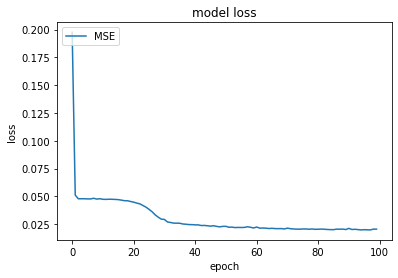

In [123]:
plt.plot(history_mae.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['MSE'], loc='upper left')
plt.show()

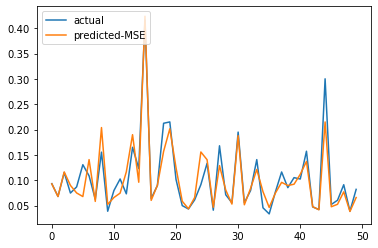

In [126]:
fig, ax2 = plt.subplots()
y_mse=predictor(model_mse,x_test_pca)
ax2.plot(y_test[150:200])
ax2.plot(y_mse[150:200])
ax2.legend(['actual', 'predicted-MSE'], loc='upper left')